<a href="https://colab.research.google.com/github/macscheffer/DS-Sprint-01-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  45088      0 --:--:-- --:--:-- --:--:-- 44955
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar "clean" source.

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [24]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed


import pandas as pd
import os
import matplotlib.pyplot as plt
print(os.listdir())

['.config', 'sample_data']


In [0]:
df = pd.read_csv('https://data.maryland.gov/api/views/is7h-kp6x/rows.csv?accessType=DOWNLOAD')

In [16]:
df.head()

,Jurisdictions,Total Households,Population 25 years and older,Less than 9th Grade,High School no Diploma,High School Diploma,Some College no degree,Associates degree,Bachelor's degree,Graduate or Professional,...,Male,Female,White Alone,Black Alone,Asian Alone,American Indian/Alaska Native Alone,Native Hawaiian/Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino (of any race)
0,Allegany County,28167,50793,1454,4089,21302,9999,4825,4733,4391,...,38077,34983,64695,6021,580,118,34,167,1445,1233
1,Anne Arundel County,204829,382657,8852,22100,93862,78474,28736,88157,62476,...,276842,282895,416331,89001,20103,1222,383,12470,20227,39402
2,Baltimore County,312826,569088,18308,33161,154724,111102,40101,121891,89801,...,391102,434564,519063,226879,47772,2110,394,7828,21620,40850
3,Calvert County,31479,60627,1065,3001,18704,15532,4570,10038,7717,...,44966,45561,73873,11124,1371,77,0,530,3552,3092
4,Caroline County,12010,22037,1291,2389,9207,4171,1608,2112,1259,...,15822,16831,26419,4411,187,30,16,623,967,2101


In [17]:
df.columns

Index(['Jurisdictions', 'Total Households', 'Population 25 years and older',
       'Less than 9th Grade', 'High School no Diploma', 'High School Diploma',
       'Some College no degree', 'Associates degree', 'Bachelor's degree',
       'Graduate or Professional',
       'Employment Status of the Population 16 years and over',
       'Civilian Labor Force (16 years & over)', 'Employed', 'Unemployed',
       'Unemployment Rate', 'Commute Workers 16 yrs and over',
       'Percent Drove Alone', 'Percent Carpooled',
       'Percent Public Transportation', 'Percent Walked', 'Percent Other',
       'Percent Worked at Home', 'Median Household Income ($)', 'Families',
       'Percent Families in Poverty',
       'Percent Civilian Population w/ Health Ins. Cov.',
       'Total Housing Units', 'Percent Occupied', 'Percent Vacant',
       'Total Population', 'Voting Age Population', 'Male', 'Female',
       'White Alone', 'Black Alone', 'Asian Alone',
       'American Indian/Alaska Native Alone'

In [18]:
df.describe()

,Total Households,Population 25 years and older,Less than 9th Grade,High School no Diploma,High School Diploma,Some College no degree,Associates degree,Bachelor's degree,Graduate or Professional,Employment Status of the Population 16 years and over,...,Male,Female,White Alone,Black Alone,Asian Alone,American Indian/Alaska Native Alone,Native Hawaiian/Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino (of any race)
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,90728.833333,168859.958333,6939.208333,10592.291667,42929.375000,32707.000000,10829.125000,34947.166667,29915.791667,198537.541667,...,120280.583333,128048.666667,142010.000000,73580.250000,15094.125000,664.416667,116.333333,9107.750000,7756.375000,22922.750000
std,109600.559288,206012.321409,11559.927335,13253.966771,46402.207389,38344.041128,12086.026805,47806.227001,49286.355633,241513.427231,...,144926.002874,157867.449378,153237.979994,140144.496515,32449.782584,954.361381,148.377212,23395.180325,10348.766139,47322.753507
min,7683.000000,13928.000000,672.000000,1099.000000,4582.000000,2511.000000,746.000000,1356.000000,1014.000000,16817.000000,...,9539.000000,10280.000000,13719.000000,187.000000,93.000000,27.000000,0.000000,15.000000,301.000000,301.000000
25%,17459.000000,32594.500000,1063.000000,2559.500000,9927.750000,6113.000000,2333.250000,5227.250000,4352.000000,37280.750000,...,22546.500000,23404.500000,39741.500000,5900.250000,484.750000,75.000000,15.500000,375.000000,944.500000,1711.500000
50%,38074.000000,70913.000000,2255.500000,5064.500000,23972.000000,15635.500000,5445.500000,11311.000000,7921.500000,83966.500000,...,52889.500000,54331.000000,80771.000000,13263.000000,2558.500000,231.000000,49.500000,792.500000,3363.000000,5032.000000
75%,96840.750000,180179.750000,4323.250000,8878.500000,42841.000000,34061.000000,12831.000000,44361.500000,34750.750000,210083.250000,...,129332.000000,135111.750000,184672.750000,58827.000000,11953.750000,741.000000,150.000000,4229.250000,8728.000000,19817.500000
max,367764.000000,703977.000000,44633.000000,48234.000000,154724.000000,135389.000000,40101.000000,186973.000000,222076.000000,811165.000000,...,494612.000000,531759.000000,566239.000000,570138.000000,149770.000000,3449.000000,503.000000,86885.000000,42609.000000,190550.000000


In [0]:
df['Percent Male'] = df['Male'] / (df['Male'] + df['Female'])

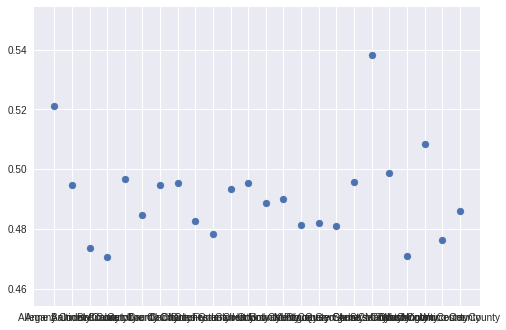

In [27]:
myplot = plt.scatter(df['Jurisdictions'],df['Percent Male'])
plt.show(myplot)

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. I suggset image, text, or (public) API - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.